In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop


Loading the MNIST dataset(60k training and 10k test samples). Coverting the images samples into the format keras/tensorflow expects.
Also normalizing the image data into 0-1 range.

In [2]:
(mnist_train_images,mnist_train_labels),(mnist_test_images,mnist_test_labels)=mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [6]:
train_images=mnist_train_images.reshape(60000,784)
test_images=mnist_test_images.reshape(10000,784)
train_images=train_images.astype('float32')
test_images=test_images.astype('float32')
train_images/=255
test_images/=255

Converting the labels into one-hot format

In [8]:
train_labels=keras.utils.to_categorical(mnist_train_labels,10)
test_labels=keras.utils.to_categorical(mnist_test_labels,10)

Displaying an image sample to check if it looks alright:

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


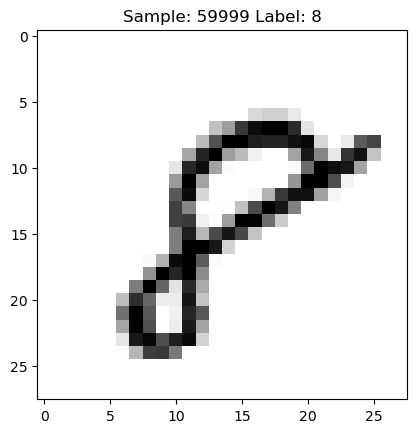

In [13]:
import matplotlib.pyplot as plt

def display(num):
    #one-hot array of the sample
    print(train_labels[num])
    #label converted back to a number
    label=train_labels[num].argmax(axis=0)
    #reshape those 784 values into 28x28 image
    image=train_images[num].reshape([28,28])
    plt.title('Sample: %d Label: %d'% (num,label))
    plt.imshow(image,cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display(59999)

Setting up the neural network:

In [48]:
model=Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [49]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 512)               401920    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Using RMSprop optimizer and training the model with 10 epochs of batch size 100.

In [53]:
model.compile(loss='categorical_crossentropy', optimizer='RMSprop',metrics=['accuracy'])

In [54]:
history=model.fit(train_images,train_labels,
                  batch_size=100,
                  epochs=10,
                  verbose=2,
                  validation_data=(test_images,test_labels))

Epoch 1/10
600/600 - 9s - loss: 0.0139 - accuracy: 0.9957 - val_loss: 0.0609 - val_accuracy: 0.9815 - 9s/epoch - 16ms/step
Epoch 2/10
600/600 - 9s - loss: 0.0104 - accuracy: 0.9970 - val_loss: 0.0589 - val_accuracy: 0.9834 - 9s/epoch - 15ms/step
Epoch 3/10
600/600 - 9s - loss: 0.0095 - accuracy: 0.9970 - val_loss: 0.0600 - val_accuracy: 0.9838 - 9s/epoch - 15ms/step
Epoch 4/10
600/600 - 9s - loss: 0.0081 - accuracy: 0.9974 - val_loss: 0.0610 - val_accuracy: 0.9842 - 9s/epoch - 15ms/step
Epoch 5/10
600/600 - 9s - loss: 0.0074 - accuracy: 0.9978 - val_loss: 0.0568 - val_accuracy: 0.9856 - 9s/epoch - 15ms/step
Epoch 6/10
600/600 - 10s - loss: 0.0062 - accuracy: 0.9981 - val_loss: 0.0616 - val_accuracy: 0.9849 - 10s/epoch - 17ms/step
Epoch 7/10
600/600 - 11s - loss: 0.0055 - accuracy: 0.9985 - val_loss: 0.0653 - val_accuracy: 0.9847 - 11s/epoch - 19ms/step
Epoch 8/10
600/600 - 9s - loss: 0.0050 - accuracy: 0.9987 - val_loss: 0.0653 - val_accuracy: 0.9848 - 9s/epoch - 14ms/step
Epoch 9/10
6

In [55]:
score=model.evaluate(test_images,test_labels,verbose=0)
print('test loss:',score[0])
print('test accuracy:',score[1])

test loss: 0.06480272859334946
test accuracy: 0.9848999977111816


Visualizing the ones that model didn't predict right

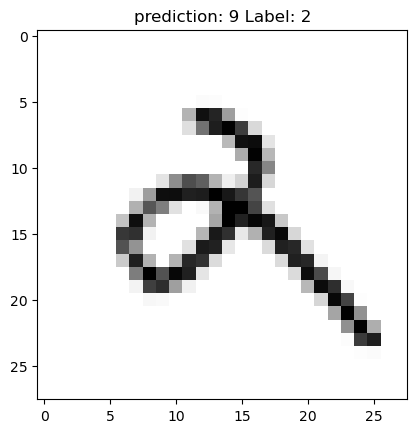

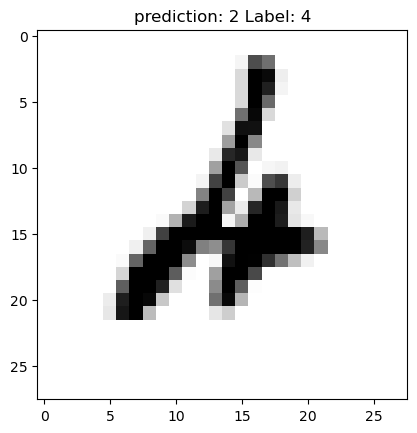

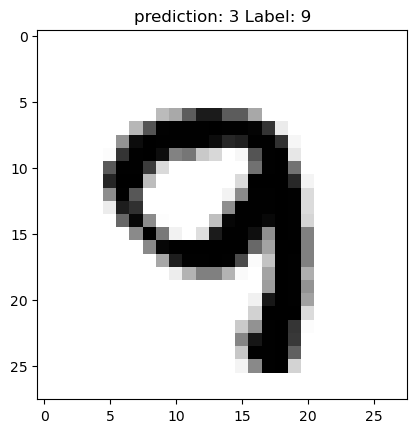

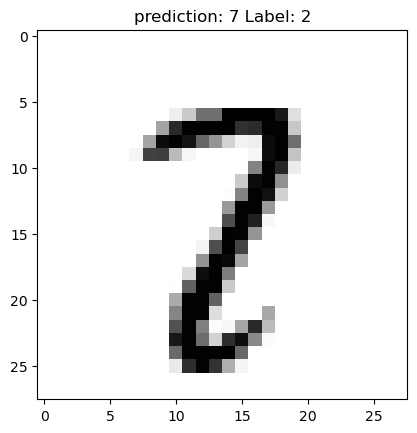

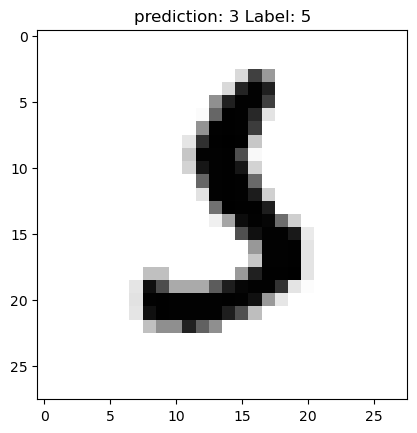

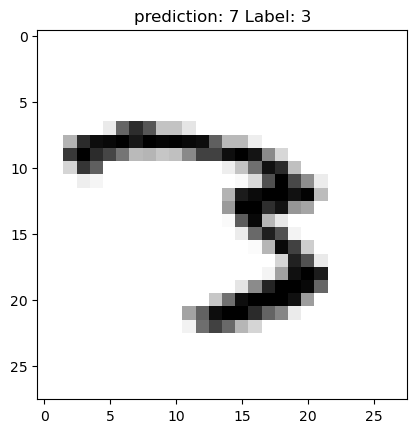

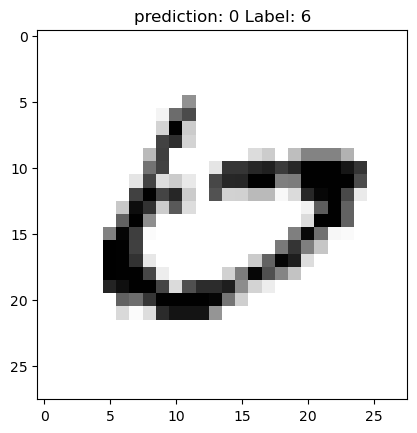

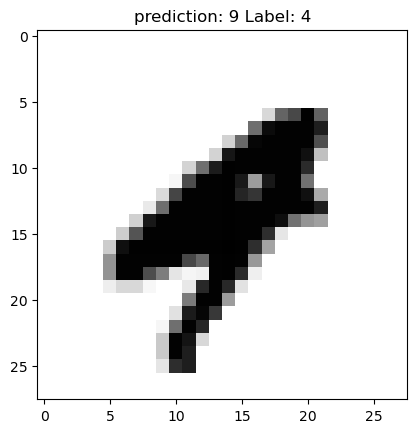

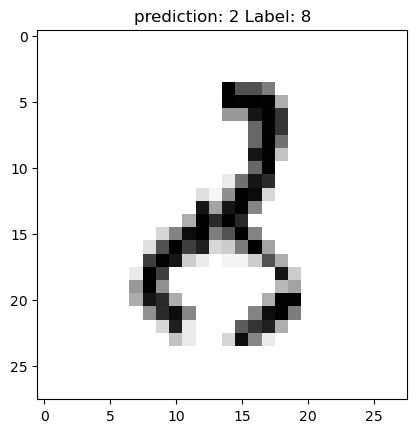

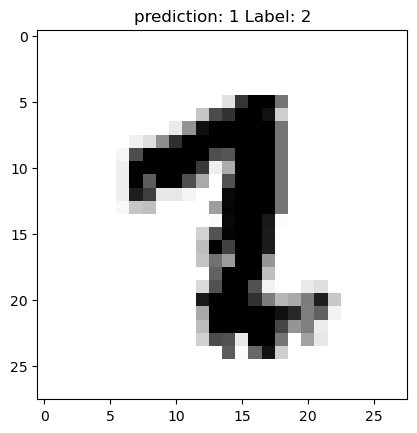

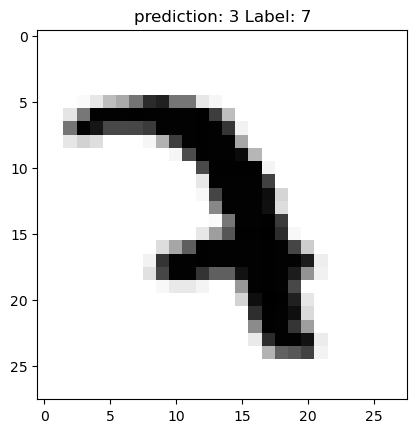

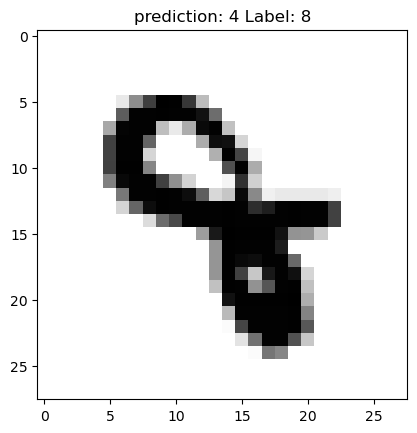

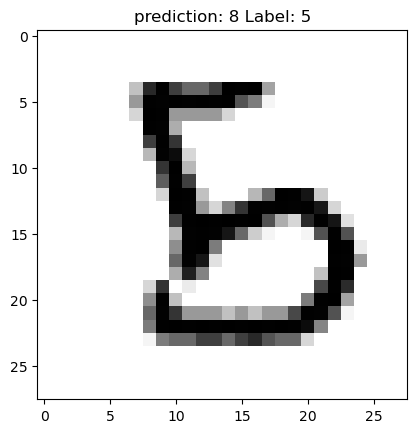

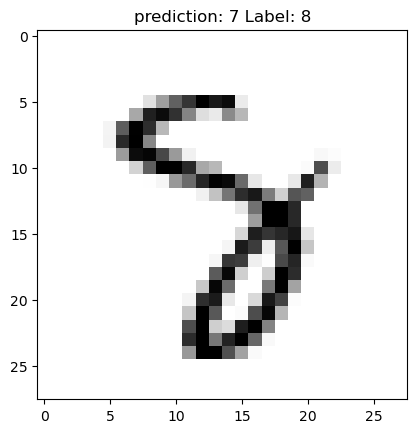

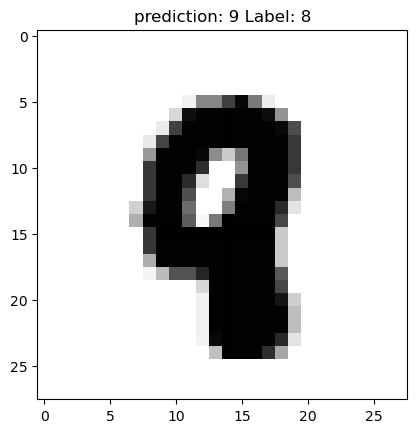

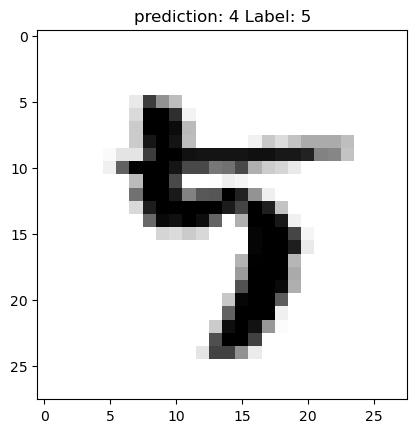

In [56]:
for x in range(1000):
    test_image=test_images[x,:].reshape(1,784)
    predicted_cat=model.predict(test_image,verbose=0).argmax()
    label=test_labels[x].argmax()
    if(predicted_cat!=label):
        plt.title('prediction: %d Label: %d' % (predicted_cat,label))
        plt.imshow(test_image.reshape([28,28]),cmap=plt.get_cmap('gray_r'))
        plt.show()